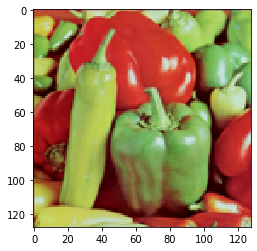

In [2]:
from matplotlib.image import imread, imsave
import matplotlib.pyplot as plt
A = imread('peppers-small.tiff')
plt.imshow(A)
plt.show()
imsave('peppers-small.png', A)

In [4]:
from matplotlib.image import imread, imsave
import matplotlib.pyplot as plt
import numpy as np

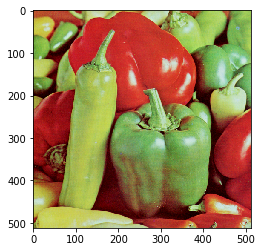

In [8]:
A = imread('peppers-large.png')
A = A[:, :, :3]
m, n, k = A.shape
plt.imshow(A)
plt.show()

50
error 0.00034614996


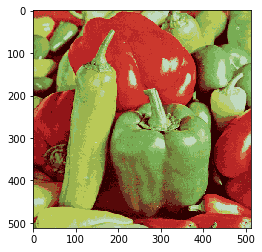

In [9]:
K = 16
ind = np.random.randint(m, size=K * 2).reshape(-1, 2)
center = A[ind[:, 0], ind[:, 1]]
max_iter = 1000
eps = 1e-4
it = 0
error = 1
cat = np.zeros((m, n))
while it < max_iter and error > eps:
    it += 1
    c_old = center.copy()
    
    for i in range(m):
        for j in range(n):
            cat[i, j]=np.argmin(np.linalg.norm(A[i, j] - center, axis=1))
            
    for i in range(K):
        center[i] = np.mean(A[cat == i], axis=0)
    
    error = np.mean(np.linalg.norm(center - c_old, axis=1))
    if it % 50 == 0:
        print(it)
        print('error', error)
        
A_cmprs = np.zeros_like(A)
for i in range(K):
    A_cmprs[cat == i] = center[i]
plt.imshow(A_cmprs)
plt.show()
imsave('peppers_large_compressed.png', A_cmprs)